# **Subscription Classifier**


In this notebook we will create a dataset of hypothetical customer data of a website. We want to find out which combination of demographics and behaviour leads to customers signing on for a subscription. 

**Features**

1) Age

2) Gender

3) Time spent on website (total)

4) Time spent on website (average session)

5) Amount of clicks (total)

6) Amount of clicks (average session)

7) Purchases made (total, euros)

8) Purchases made (average session, euros)

9) Advertisements watched (total, minutes)

10) Advertisements watched (average session, minutes)
 


In [1]:
# importing libraries, etc...

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


In [2]:
#Creating the Dataset
customers = 100
age = np.random.normal(25, 5, customers) #25 is mean, 5 is standard deviation

genders = [0,1,2]
gender = np.random.choice(genders, customers, p=[0.4,0.5,0.1]) #generating male female and nonbinary with varied probabilities

time_total = abs(np.random.normal(500, 10000, customers)) #generating time in minutes
time_average = abs(np.random.normal(20, 50, customers)) #same here

clicks_total = abs(np.random.normal(300, 1000, customers)).round(0) #clicks are rounded to full numbers
clicks_average = abs(np.random.normal(50, 200, customers)).round(0)

purchases_total = abs(np.random.normal(300, 1000000, customers)) #absolute value for purchases in euros
purchases_average = abs(np.random.normal(20, 200, customers))

ads_total = abs(np.random.normal(100, 400, customers)) #advertisements watched in minutes
ads_average = abs(np.random.normal(5, 2, customers))


Text(0.5, 0, 'Identity')

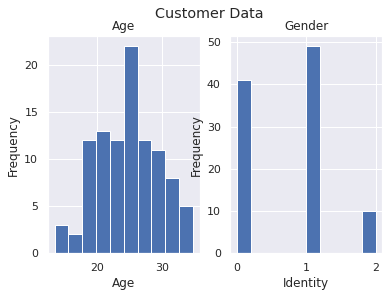

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Customer Data')

ax1.hist(age);
ax1.set_title('Age')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Age')

ax2.hist(gender);
ax2.set_title('Gender')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Identity')





Text(0.5, 0, 'Minutes')

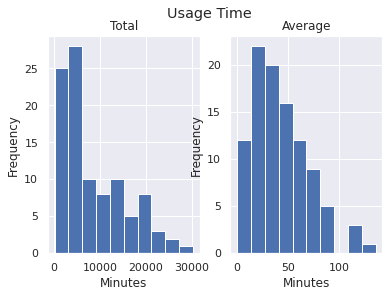

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Usage Time')

ax1.hist(time_total);
ax1.set_title('Total')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Minutes')

ax2.hist(time_average);
ax2.set_title('Average')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Minutes')

Text(0.5, 0, 'Clicks')

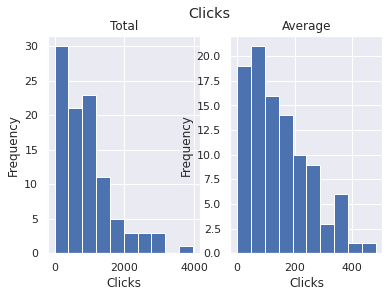

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Clicks')


ax1.hist(clicks_total);
ax1.set_title('Total')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Clicks')

ax2.hist(clicks_average);
ax2.set_title('Average')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Clicks')

Text(0.5, 0, 'Euros Spent')

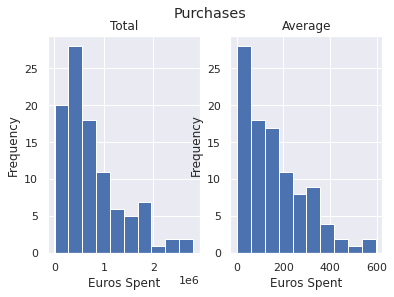

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Purchases')


ax1.hist(purchases_total);
ax1.set_title('Total')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Euros Spent')

ax2.hist(purchases_average);
ax2.set_title('Average')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Euros Spent')

Text(0.5, 0, 'Minutes')

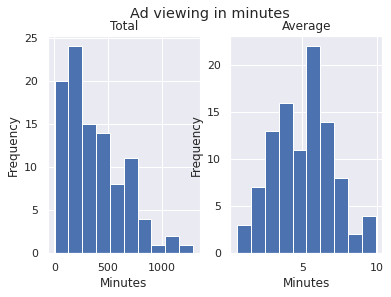

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Ad viewing in minutes')

ax1.hist(ads_total);
ax1.set_title('Total')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Minutes')

ax2.hist(ads_average);
ax2.set_title('Average')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Minutes')

In [8]:
#now we will add labels whether they are subscribers/premium users or not
premium = [0,1] #0 is false, 1 is true
premium_users = np.random.choice(premium, customers, p=[0.9,0.1]) #only 10% is subscribed
print(premium_users)


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [9]:
data = pd.DataFrame({'Age':age, 'Gender':gender, 'TimeTotal' : time_total, 'TimeAvg' : time_average,
                     'ClicksTotal':clicks_total, 'ClicksAvg': clicks_average, 'PurchasesTotal': purchases_total,
                     'PurchasesAvg': purchases_average, 'AdsTotal': ads_total, 'AdsAvg': ads_average, 'Premium': premium_users})

data

,Age,Gender,TimeTotal,TimeAvg,ClicksTotal,ClicksAvg,PurchasesTotal,PurchasesAvg,AdsTotal,AdsAvg,Premium
0,27.058324,0,686.953176,36.716438,1366.0,108.0,9.514095e+05,71.742841,682.234899,7.476960,0
1,24.716483,1,9836.700023,50.579361,903.0,219.0,5.628822e+05,299.025416,223.137972,4.535376,0
2,24.588787,0,732.091851,25.711426,333.0,374.0,1.702305e+06,118.555490,453.233162,0.659920,0
3,25.619699,0,2807.789823,56.947566,27.0,185.0,1.382077e+06,14.608184,395.570572,7.654666,0
4,25.749110,1,3580.970905,13.555419,230.0,5.0,3.969985e+05,31.023685,1145.042085,3.270058,0
...,...,...,...,...,...,...,...,...,...,...,...
95,18.073433,1,12811.646836,39.078088,1034.0,62.0,5.248051e+05,229.838318,674.741876,5.738547,0
96,24.189735,0,24602.377689,21.099473,2169.0,211.0,2.674714e+05,27.391384,91.360327,5.410781,0
97,29.501760,0,12984.037726,14.638198,1148.0,44.0,5.163531e+05,174.320296,178.790845,6.715227,0
98,24.662502,0,19840.455252,28.730329,1428.0,65.0,2.854096e+04,269.701542,551.188697,4.433328,0


**Now that we have the data, let's get to training some classifiers**

In [10]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data)

data[:] = scaler.transform(data)
data

,Age,Gender,TimeTotal,TimeAvg,ClicksTotal,ClicksAvg,PurchasesTotal,PurchasesAvg,AdsTotal,AdsAvg,Premium
0,0.637828,0.0,0.018750,0.269306,0.344540,0.224066,0.338842,0.117249,0.526908,0.736932,0.0
1,0.528849,0.5,0.322558,0.371526,0.227503,0.454357,0.199693,0.500387,0.171114,0.418942,0.0
2,0.522906,0.0,0.020249,0.188159,0.083418,0.775934,0.607769,0.196163,0.349435,0.000000,0.0
3,0.570881,0.0,0.089170,0.418483,0.006067,0.383817,0.493082,0.020936,0.304747,0.756142,0.0
4,0.576903,0.5,0.114843,0.098524,0.057381,0.010373,0.140283,0.048608,0.885576,0.282160,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.219708,0.5,0.421338,0.286720,0.260617,0.128631,0.186056,0.383756,0.521101,0.549007,0.0
96,0.504336,0.0,0.812837,0.154152,0.547523,0.437759,0.093894,0.042485,0.068989,0.513575,0.0
97,0.751536,0.0,0.427062,0.106509,0.289434,0.091286,0.183029,0.290167,0.136746,0.654587,0.0
98,0.526337,0.0,0.654722,0.210419,0.360212,0.134855,0.008323,0.450954,0.425349,0.407911,0.0


In [12]:
#Train test split (ratio = 25/75))
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(data.loc[:, data.columns!='Premium'], #feature columns
                                                                            data["Premium"], #target labels
                                                                            test_size=0.25, #train/test ratio
                                                                            random_state=99 #random seed
                                                                            )

In [13]:
features_train #Note that 'Premium' is excluded 

,Age,Gender,TimeTotal,TimeAvg,ClicksTotal,ClicksAvg,PurchasesTotal,PurchasesAvg,AdsTotal,AdsAvg
92,0.433863,0.5,0.163229,0.561949,0.102882,0.120332,0.032404,0.065733,0.571779,0.588803
46,0.536156,0.5,0.100720,0.302650,0.000000,0.161826,0.161038,0.171242,0.714897,0.761353
3,0.570881,0.0,0.089170,0.418483,0.006067,0.383817,0.493082,0.020936,0.304747,0.756142
86,0.959927,0.5,0.558713,0.212102,0.226744,0.045643,0.190924,0.554112,0.148610,0.697488
58,0.903722,1.0,0.043031,0.652427,0.236350,0.004149,0.269856,0.884758,0.543552,0.273453
...,...,...,...,...,...,...,...,...,...,...
73,0.650002,0.5,0.126604,0.195756,0.108948,0.114108,0.127119,0.305940,0.632541,0.706229
40,0.445945,0.5,0.000000,0.160150,0.130435,0.209544,0.223472,0.231198,0.287264,0.214528
57,0.200019,0.5,0.007027,0.217027,0.095551,0.307054,0.178897,0.092785,0.241577,0.163379
35,0.474318,0.0,0.424784,0.331382,0.257331,0.417012,0.659973,0.585276,0.086127,0.273390


In [14]:
target_train  #Only the target labels are included here

92    0.0
46    0.0
3     0.0
86    0.0
58    0.0
     ... 
73    0.0
40    0.0
57    1.0
35    0.0
1     0.0
Name: Premium, Length: 75, dtype: float64

**Lets visualize some data now**

**Fit, predict, evaluate**

In [15]:
# fitting k-NN on the training set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform").fit(features_train, target_train)

In [16]:
# concatenating features and target to make plotting easier

train = pd.concat([features_train, target_train], 
                       axis=1)
test = pd.concat([features_test, target_test], 
                      axis=1)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

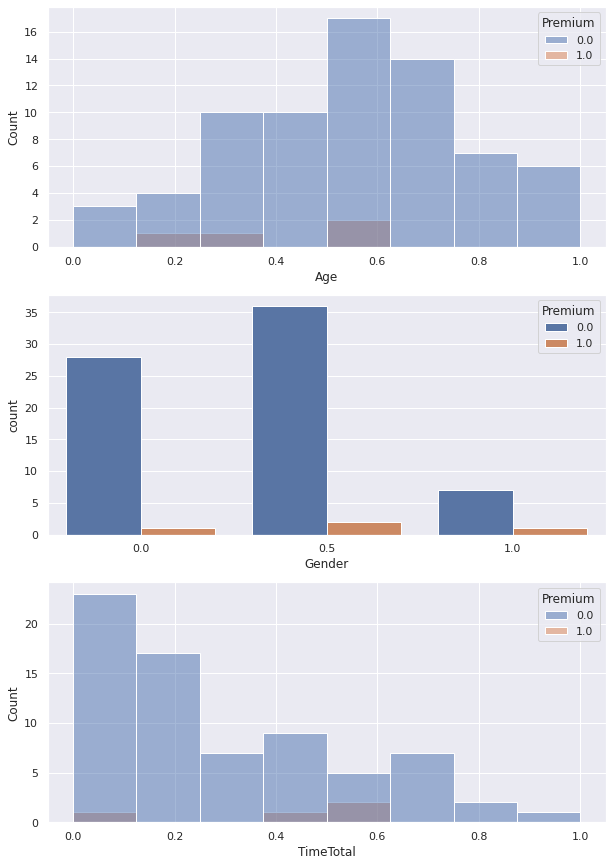

In [17]:
# plotting each feature against the target 

fig, axes = plt.subplots(3, figsize=(10,15))

for i in range(3):
    if len(train.iloc[:,i].value_counts()) > 3:
      sns.histplot(ax=axes[i],x=train.columns[i], data=train, hue="Premium")
    else:
      sns.countplot(ax=axes[i], x=train.columns[i], data=train, hue='Premium') 

In [45]:
import warnings
warnings.filterwarnings('ignore') #don't tell anyone i used this function, its pretty bad practise :,^)

# what would our model predict for a new customer we know the following things of?
age = 25
gender = 0
time_total = 200
time_average = 10
purchases_total = 400
purchases_average = 30
clicks_total = 1000
clicks_average = 100
ads_total = 300
ads_average = 5
subscription = 0 #this is unknown, but for the purpose of using the same minmax scaler i set it to 0 here

new_customer = np.array([age, gender, time_total, time_average, purchases_total, purchases_average, clicks_total, clicks_average, ads_total, ads_average, subscription])

#scaler = MinMaxScaler().fit(new_customer)
new_customer = scaler.transform(new_customer.reshape(1,-1))
 
new_customer = new_customer[0][0:10]

outcome = knn.predict(new_customer.reshape(1,-1))

def subscribed(x):
  if x == 0:
    return "This person is not likely to be a premium user!"

  if x == 1:
    return "This person is likely a premium user!"

print("Test prediction: {}, {}".format(outcome, subscribed(outcome)) )

Test prediction: [0.], This person is not likely to be a premium user!


In [46]:
#Model evaluation

print(f"Training set score: {knn.score(features_train, target_train):.2f}")
print(f"Test set score: {knn.score(features_test, target_test):.2f}")

Training set score: 0.95
Test set score: 0.96


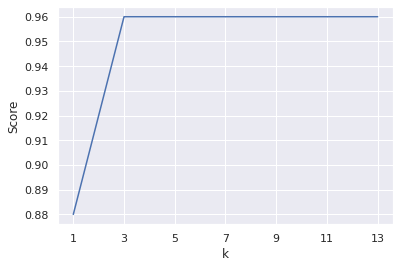

In [47]:
#Number of neighbours vs accuracy score
neighbors_settings = [k for k in range(1,14,2)]
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    scores.append(knn.score(features_test, target_test))
    
settingsPlot = sns.lineplot(x=neighbors_settings, y=scores)
settingsPlot.set_xticks(neighbors_settings)
settingsPlot.set_xlabel("k")
settingsPlot.set_ylabel("Score")

settingsPlot